[View in Colaboratory](https://colab.research.google.com/github/gmihaila/toy_models/blob/master/vanila_nn.ipynb)

## Vanila Neural Network

### Simple implementation to play around and modify

by GeorgeM.

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2018-05-25 22:24:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.01s   

2018-05-25 22:24:45 (1.60 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [24]:
# Install pydot
!apt-get -qq install -y graphviz && pip install -q pydot

Selecting previously unselected package fontconfig.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../04-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
Unpa

Setting up libpathplan4 (2.38.0-16ubuntu2) ...
Setting up libxcb-render0:amd64 (1.12-1ubuntu1) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libdatrie1:amd64 (0.2.10-5) ...
Setting up libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Setting up libgraphite2-3:amd64 (1.3.10-2) ...
Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libltdl7:amd64 (2.4.6-2) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libxt6:amd64 (1:1.1.5-1) ...
Setting up libthai-data (0.1.26-3) ...
Setting up libcdt5 (2.38.0-16ubuntu2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libcgraph6 (2.38.0-16ubuntu2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up libcairo2:amd64 (1.14.10-1ubuntu1) ...
Setting up libgvpr2 (2.38.0-16ubuntu2) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up libthai0:amd64 (0.

In [2]:
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model

from IPython.display import Image

Using TensorFlow backend.


In [3]:
# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)
data = np.array(df.values, dtype=float)

x = data[:,:8]  # fist 8 columns
y = data[:,8]   # last column

print('x shape: ',x.shape)
print('y shape: ',y.shape)

('x shape: ', (768, 8))
('y shape: ', (768,))


In [0]:
# build model

n_input = 8  # number of inputs
n_output = 1 # number of outputs

# build each layer
model_input = Input(shape=(n_input,), name='INPUT')
model_layer1 = Dense(units=8, activation='relu', name='DENSE1')(model_input)
model_output = Dense(units=1, activation='sigmoid', name='OUTPUT')(model_layer1)
# assemble model
model = Model([model_input], model_output)
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

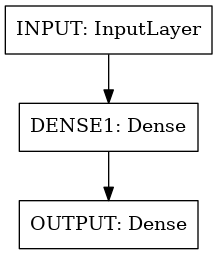

In [5]:
# image model
plot_model(model, to_file='model.png')
Image('model.png')

In [6]:
# fit model
model.fit(x, y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 316us/step - loss: 2.9456 - acc: 0.6263
Epoch 2/150
768/768 [==============================] - 0s 166us/step - loss: 2.1683 - acc: 0.6341
Epoch 3/150
768/768 [==============================] - 0s 171us/step - loss: 1.9201 - acc: 0.6484
Epoch 4/150
768/768 [==============================] - 0s 151us/step - loss: 1.7737 - acc: 0.6523
Epoch 5/150
768/768 [==============================] - 0s 162us/step - loss: 1.6268 - acc: 0.6497
Epoch 6/150
768/768 [==============================] - 0s 174us/step - loss: 1.5711 - acc: 0.6497
Epoch 7/150
768/768 [==============================] - 0s 161us/step - loss: 1.4742 - acc: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 165us/step - loss: 1.3810 - acc: 0.6693
Epoch 9/150
768/768 [==============================] - 0s 179us/step - loss: 1.3281 - acc: 0.6706
Epoch 10/150
768/768 [==============================] - 0s 165us/step - loss: 1.1873 - acc: 0.6836
Epoch 11/150
768/76

Epoch 24/150
768/768 [==============================] - 0s 155us/step - loss: 0.6467 - acc: 0.7096
Epoch 25/150
768/768 [==============================] - 0s 151us/step - loss: 0.6385 - acc: 0.6966
Epoch 26/150
768/768 [==============================] - 0s 152us/step - loss: 0.6620 - acc: 0.6888
Epoch 27/150
768/768 [==============================] - 0s 156us/step - loss: 0.6387 - acc: 0.6979
Epoch 28/150
768/768 [==============================] - 0s 151us/step - loss: 0.6854 - acc: 0.6823
Epoch 29/150
768/768 [==============================] - 0s 135us/step - loss: 0.6376 - acc: 0.6836
Epoch 30/150
768/768 [==============================] - 0s 133us/step - loss: 0.6241 - acc: 0.6875
Epoch 31/150
768/768 [==============================] - 0s 147us/step - loss: 0.6263 - acc: 0.6966
Epoch 32/150
768/768 [==============================] - 0s 151us/step - loss: 0.6375 - acc: 0.7018
Epoch 33/150
768/768 [==============================] - 0s 151us/step - loss: 0.6359 - acc: 0.6953
Epoch 34/1

768/768 [==============================] - 0s 140us/step - loss: 0.6166 - acc: 0.7018
Epoch 47/150
768/768 [==============================] - 0s 140us/step - loss: 0.6380 - acc: 0.6914
Epoch 48/150
768/768 [==============================] - 0s 147us/step - loss: 0.5786 - acc: 0.7227
Epoch 49/150
768/768 [==============================] - 0s 133us/step - loss: 0.6137 - acc: 0.7148
Epoch 50/150
768/768 [==============================] - 0s 146us/step - loss: 0.6160 - acc: 0.6979
Epoch 51/150
768/768 [==============================] - 0s 147us/step - loss: 0.5935 - acc: 0.7187
Epoch 52/150
768/768 [==============================] - 0s 134us/step - loss: 0.5953 - acc: 0.7266
Epoch 53/150
768/768 [==============================] - 0s 158us/step - loss: 0.6131 - acc: 0.7201
Epoch 54/150
768/768 [==============================] - 0s 130us/step - loss: 0.6083 - acc: 0.6940
Epoch 55/150
768/768 [==============================] - 0s 135us/step - loss: 0.5981 - acc: 0.7083
Epoch 56/150
768/768 [=

Epoch 69/150
768/768 [==============================] - 0s 133us/step - loss: 0.5730 - acc: 0.7253
Epoch 70/150
768/768 [==============================] - 0s 148us/step - loss: 0.5633 - acc: 0.7266
Epoch 71/150
768/768 [==============================] - 0s 158us/step - loss: 0.6082 - acc: 0.7214
Epoch 72/150
768/768 [==============================] - 0s 132us/step - loss: 0.5753 - acc: 0.7083
Epoch 73/150
768/768 [==============================] - 0s 127us/step - loss: 0.6068 - acc: 0.7201
Epoch 74/150
768/768 [==============================] - 0s 149us/step - loss: 0.6167 - acc: 0.7044
Epoch 75/150
768/768 [==============================] - 0s 134us/step - loss: 0.5721 - acc: 0.7253
Epoch 76/150
768/768 [==============================] - 0s 131us/step - loss: 0.5655 - acc: 0.7305
Epoch 77/150
768/768 [==============================] - 0s 141us/step - loss: 0.5730 - acc: 0.7357
Epoch 78/150
768/768 [==============================] - 0s 147us/step - loss: 0.5907 - acc: 0.6966
Epoch 79/1

Epoch 92/150
768/768 [==============================] - 0s 155us/step - loss: 0.5618 - acc: 0.7383
Epoch 93/150
768/768 [==============================] - 0s 134us/step - loss: 0.5766 - acc: 0.7096
Epoch 94/150
768/768 [==============================] - 0s 154us/step - loss: 0.5682 - acc: 0.7279
Epoch 95/150
768/768 [==============================] - 0s 140us/step - loss: 0.5542 - acc: 0.7305
Epoch 96/150
768/768 [==============================] - 0s 154us/step - loss: 0.5684 - acc: 0.7370
Epoch 97/150
768/768 [==============================] - 0s 153us/step - loss: 0.5801 - acc: 0.7305
Epoch 98/150
768/768 [==============================] - 0s 161us/step - loss: 0.5529 - acc: 0.7435
Epoch 99/150
768/768 [==============================] - 0s 147us/step - loss: 0.5604 - acc: 0.7318
Epoch 100/150
768/768 [==============================] - 0s 125us/step - loss: 0.5369 - acc: 0.7253
Epoch 101/150
768/768 [==============================] - 0s 150us/step - loss: 0.5561 - acc: 0.7214
Epoch 10

768/768 [==============================] - 0s 158us/step - loss: 0.5511 - acc: 0.7409
Epoch 115/150
768/768 [==============================] - 0s 148us/step - loss: 0.5785 - acc: 0.7240
Epoch 116/150
768/768 [==============================] - 0s 145us/step - loss: 0.5567 - acc: 0.7422
Epoch 117/150
768/768 [==============================] - 0s 150us/step - loss: 0.5751 - acc: 0.7070
Epoch 118/150
768/768 [==============================] - 0s 148us/step - loss: 0.5374 - acc: 0.7487
Epoch 119/150
768/768 [==============================] - 0s 148us/step - loss: 0.5471 - acc: 0.7370
Epoch 120/150
768/768 [==============================] - 0s 143us/step - loss: 0.5723 - acc: 0.7227
Epoch 121/150
768/768 [==============================] - 0s 133us/step - loss: 0.5757 - acc: 0.7188
Epoch 122/150
768/768 [==============================] - 0s 138us/step - loss: 0.5811 - acc: 0.7201
Epoch 123/150
768/768 [==============================] - 0s 135us/step - loss: 0.5402 - acc: 0.7266
Epoch 124/150


768/768 [==============================] - 0s 135us/step - loss: 0.5421 - acc: 0.7461
Epoch 138/150
768/768 [==============================] - 0s 143us/step - loss: 0.5588 - acc: 0.7253
Epoch 139/150
768/768 [==============================] - 0s 148us/step - loss: 0.5350 - acc: 0.7422
Epoch 140/150
768/768 [==============================] - 0s 130us/step - loss: 0.5697 - acc: 0.7292
Epoch 141/150
768/768 [==============================] - 0s 165us/step - loss: 0.5601 - acc: 0.7331
Epoch 142/150
768/768 [==============================] - 0s 136us/step - loss: 0.5252 - acc: 0.7643
Epoch 143/150
768/768 [==============================] - 0s 155us/step - loss: 0.6135 - acc: 0.7057
Epoch 144/150
768/768 [==============================] - 0s 132us/step - loss: 0.5301 - acc: 0.7539
Epoch 145/150
768/768 [==============================] - 0s 136us/step - loss: 0.5382 - acc: 0.7487
Epoch 146/150
768/768 [==============================] - 0s 147us/step - loss: 0.5729 - acc: 0.7135
Epoch 147/150


In [8]:
# evaluate the model
scores = model.evaluate(x, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 64us/step

acc: 74.35%


ref: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 